# Importing Libraries

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframes

In [3]:
#importing dataframes
path = r'/Users/hollyringsak/01-2024 Instacart Basket Analysis'

In [4]:
cust_ords_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_merge.pkl'))

# Creating Visualizations

Text(0.5, 1.0, 'Frequency of Orders per Hour of Day')

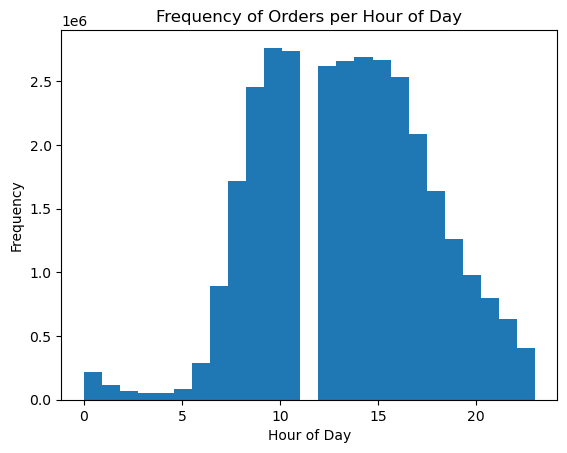

In [5]:
# Creating histogram of order_hour_of_day column
hist = cust_ords_merge['order_hour_of_day'].plot.hist(bins = 25)
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.title("Frequency of Orders per Hour of Day")

In [6]:
# The histogram shows the frequency of orders at each hour of the day. The peak hour for orders is 9. 
#We may be missing values for 11


In [7]:
#Export visualization
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

<Axes: xlabel='loyalty_flag'>

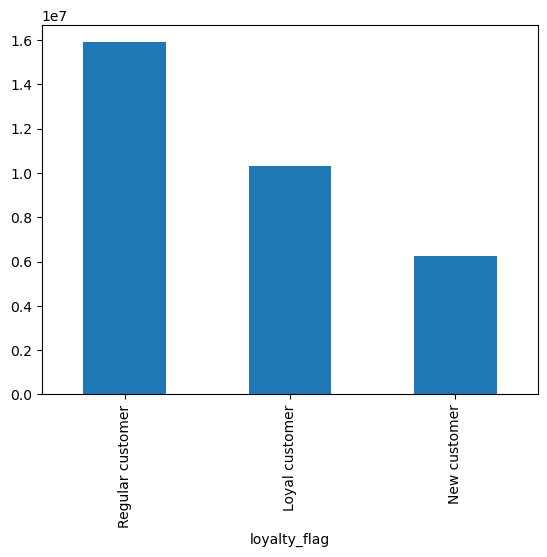

In [8]:
# Create bar chart for loyalty_flag column
cust_ords_merge['loyalty_flag'].value_counts().plot.bar()

Text(0.5, 1.0, 'Frequency of Loyal Customers')

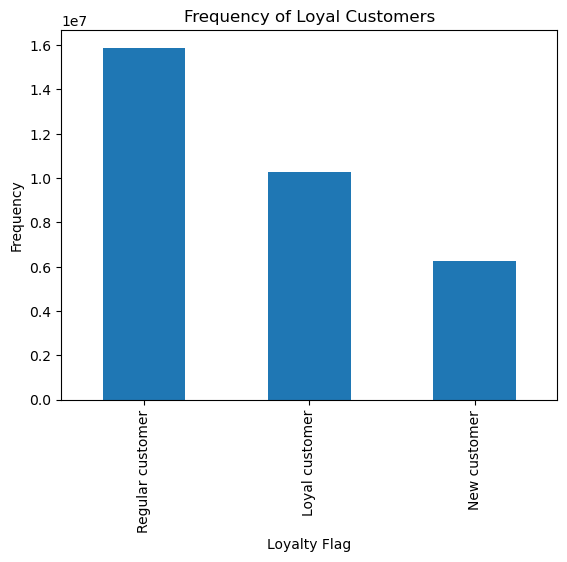

In [9]:
bar = cust_ords_merge['loyalty_flag'].value_counts().plot.bar()
plt.xlabel("Loyalty Flag")
plt.ylabel("Frequency")
plt.title("Frequency of Loyal Customers")

In [10]:
# Export chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# Creating a sample

In [11]:
# Create a list holding True/False values to the test np.random.rand <= 7
np.random.seed(4)
dev = np.random.rand(len(cust_ords_merge)) <= 0.7

In [12]:
# Store 70% of the sample in dataframe big
big = cust_ords_merge[dev]

In [13]:
# Store 30% of the sample in the dataframe small
small = cust_ords_merge[~dev]

In [14]:
# Checking sample
len(cust_ords_merge)

32434212

In [15]:
len(big)+len(small)

32434212

In [16]:
# Reducing sample to only applicable columns
df_2 = small[['order_hour_of_day','prices']]

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Average Price of Instacart Products Purchased by Hour of Day')

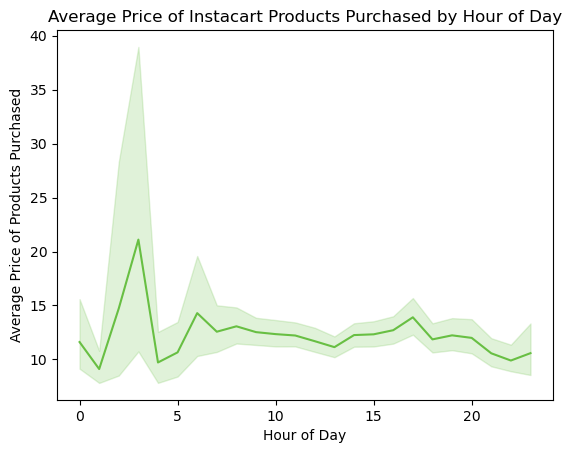

In [17]:
# Creating line graph for 'prices' and 'order_hour_of_day'
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices', color='#68bf43')
plt.xlabel("Hour of Day")
plt.ylabel("Average Price of Products Purchased")
plt.title("Average Price of Instacart Products Purchased by Hour of Day")

In [18]:
# Export line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'))

In [19]:
#Creating line graph to compare 'age' and 'number_of_dependents'
cust_ords_merge.columns

Index(['user_id', 'First Name', 'Surname', 'Gender', 'State', 'Age',
       'date_joined', 'number_of_dependents', 'fam_status', 'income',
       'Unnamed: 0', 'Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0_y', 'order_id',
       'number_of_orders', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'add_to_cart_order', 'reordered', '_merge',
       'merge_2', 'price_range_loc', 'busiest_day', 'days_of_week_loc',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'max_prices', 'spending_flag', 'mean_prices',
       'median_days_since_last_order', 'frequency_flag'],
      dtype='object')

In [20]:
# Reducing sample to applicable columns
df_3 = small[['Age', 'number_of_dependents']]

/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hollyringsak/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Connection between Age and Number of Dependants')

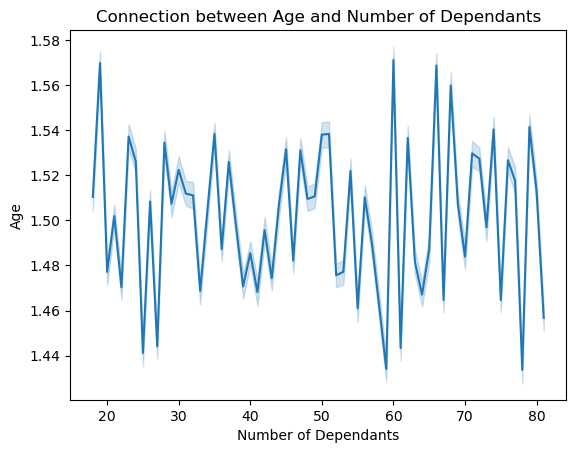

In [21]:
# Line graph
line_2 = sns.lineplot(data = df_3, x = 'Age',y = 'number_of_dependents')
plt.xlabel("Number of Dependants")
plt.ylabel("Age")
plt.title("Connection between Age and Number of Dependants")

In [22]:
# It seems there is no connection between age and number of dependents.

In [23]:
# Export line graph
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependents.png'))

In [24]:
df_4 = small[['Age', 'income']]

Text(0.5, 1.0, 'Income by Age')

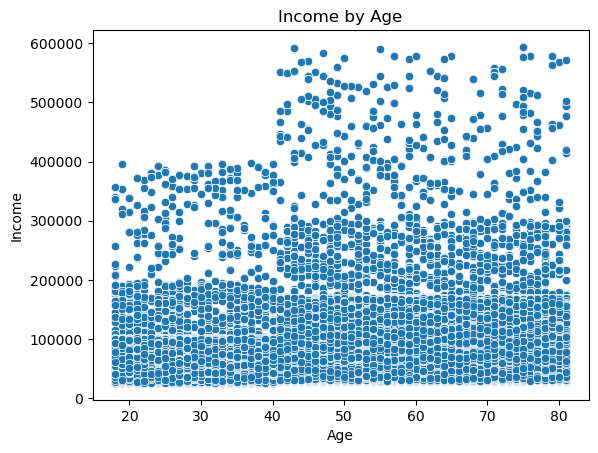

In [25]:
# Creating scatterplot of age and income
scatterplot = sns.scatterplot(x = 'Age', y = 'income',data = df_4)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Income by Age")

In [26]:
# Theres a difference in income in age groups 40 and older and under 40 years old. People under 40 largely make 200,000 & lower with a smaller group spreading between 200,000-400,000. People over the age of 40 largely make under 200,000, however the have a larger spread of people ranging between 200,000-300,000, and small group ranging up to 600,000.

In [27]:
# Export scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))